In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data-set/loan_data_set.csv


In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
%matplotlib inline

In [31]:
df = pd.read_csv("/kaggle/input/loan-data-set/loan_data_set.csv")
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
140,LP001497,Male,Yes,2,Graduate,No,5042,2083.0,185.0,360.0,1.0,Rural,N
390,LP002255,Male,No,3+,Graduate,No,9167,0.0,185.0,360.0,1.0,Rural,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N


In [32]:
df.shape

(614, 13)

In [33]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [34]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001357,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [35]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
df.LoanAmount.fillna(df.LoanAmount.mean(),inplace=True)
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(),inplace=True)

In [37]:
df.dropna(how="any",inplace=True)

In [38]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
df.drop("Loan_ID",axis=1,inplace=True)

In [40]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Married"] = le.fit_transform(df["Married"])
df["Dependents"] = le.fit_transform(df["Dependents"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df["Education"] = le.fit_transform(df["Education"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

In [41]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

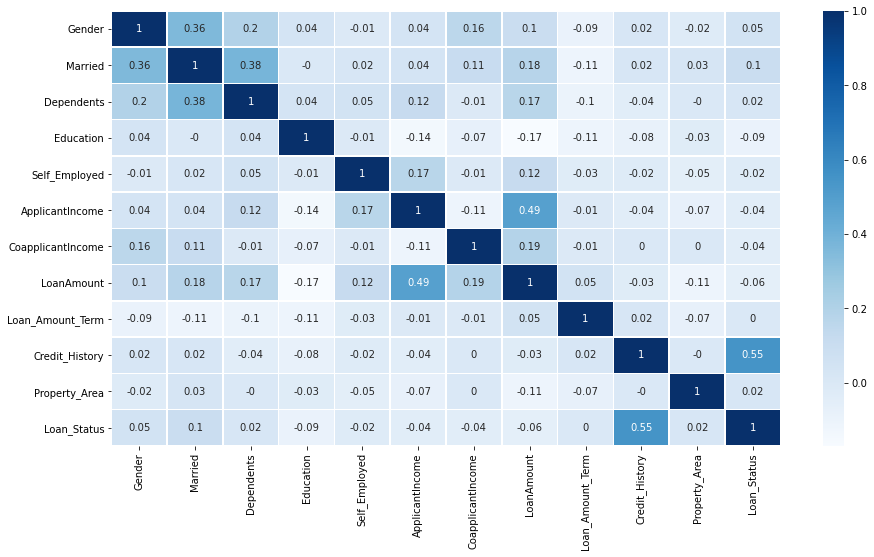

In [42]:
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(data=df.corr().round(2),annot=True,linewidths=0.5,cmap="Blues")
plt.show()

In [43]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [44]:
rf_model = RandomForestClassifier().fit(df.drop("Loan_Status",axis=1),df["Loan_Status"])

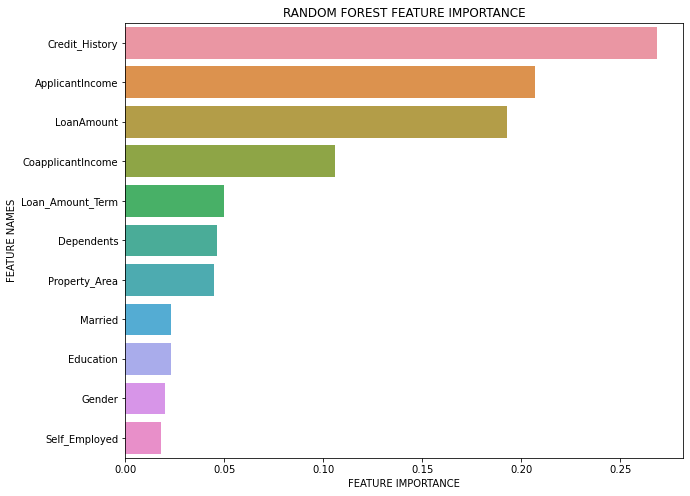

In [45]:
plot_feature_importance(rf_model.feature_importances_,df.drop("Loan_Status",axis=1).columns,'RANDOM FOREST')

In [46]:
gbc_model = GradientBoostingClassifier().fit(df.drop("Loan_Status",axis=1),df["Loan_Status"])

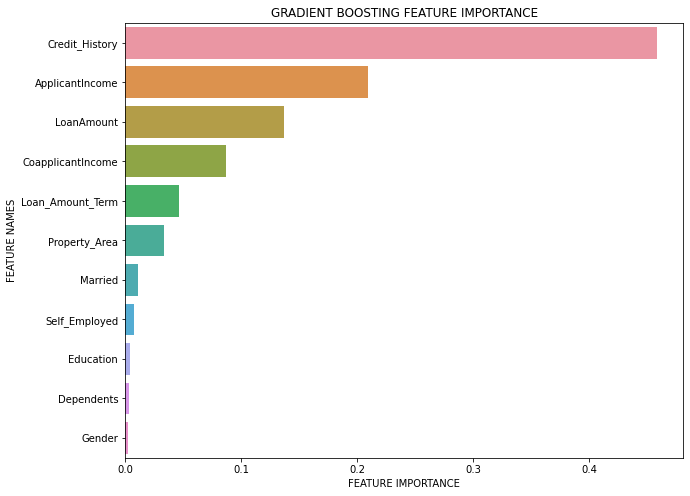

In [47]:
plot_feature_importance(gbc_model.feature_importances_,df.drop("Loan_Status",axis=1).columns,'GRADIENT BOOSTING')

In [48]:
abc_model = AdaBoostClassifier().fit(df.drop("Loan_Status",axis=1),df["Loan_Status"])

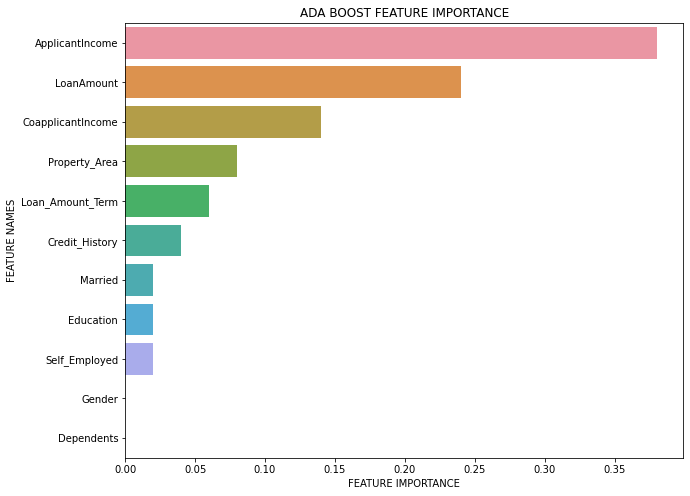

In [49]:
plot_feature_importance(abc_model.feature_importances_,df.drop("Loan_Status",axis=1).columns,'ADA BOOST')

### Top 5 features are,

* Credit_History
* ApplicantIncome
* LoanAmount
* CoapplicantIncome
* Loan_Amount_Term



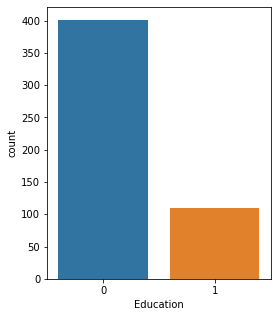

In [50]:
fig,ax=plt.subplots(figsize=(4,5))
sns.countplot(x = "Education", data=df, order = df["Education"].value_counts().index)
plt.show()

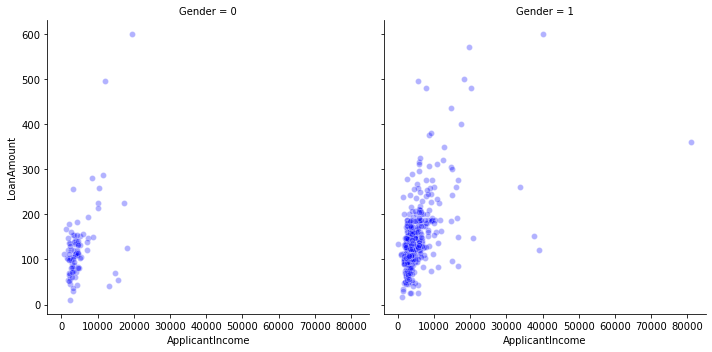

In [51]:
sns.relplot(x="ApplicantIncome", y="LoanAmount", data=df, col="Gender",color="Blue",alpha=0.3)
plt.show()

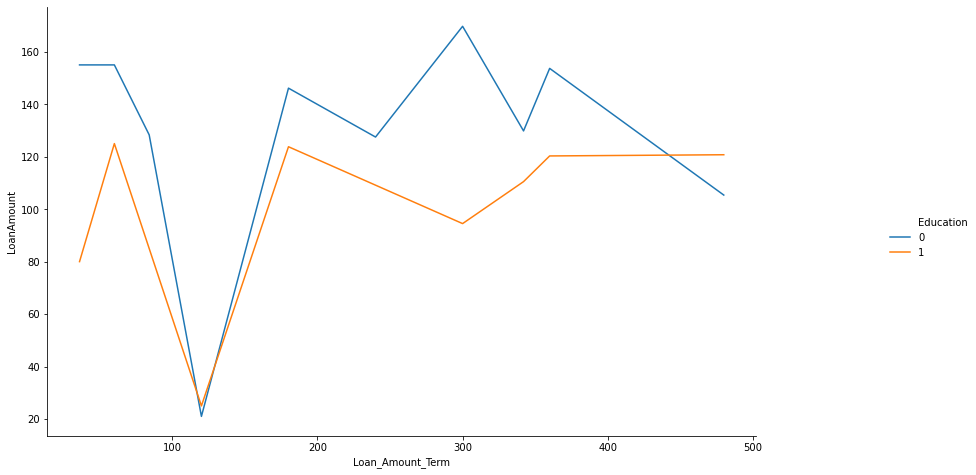

In [52]:
g=sns.relplot(x="Loan_Amount_Term", y="LoanAmount", data=df,kind="line",hue="Education",ci=None)
g.fig.set_size_inches(15,7)
plt.show()

In [53]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)

In [54]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [55]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=30)

In [56]:
clf.fit(Xtrain, ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [57]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [58]:
pred = clf.best_estimator_.predict(Xtest)

In [59]:
confusion_matrix(ytest,pred)

array([[20, 28],
       [10, 96]])

In [60]:
print("Accuracy score: {0}%".format((accuracy_score(ytest,pred)*100).round(2)))

Accuracy score: 75.32%


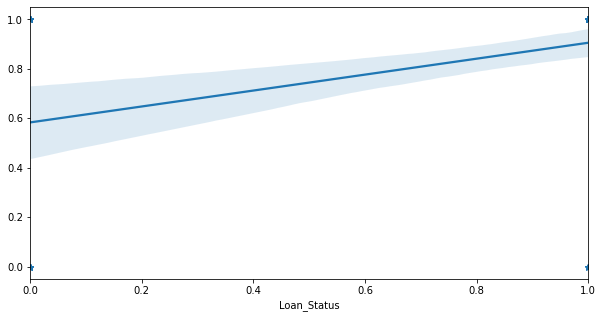

In [61]:
fig,ax=plt.subplots(figsize=(10,5))
sns.regplot(x=ytest,y=pred,marker="*")
plt.show()